In [100]:
!pip install metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.7/841.7 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17814 sha256=3ee91b55f4214f22a6108649e581f020684a1f3b263b0f983ae6f55fa8806179
  Stored in directory: /root/.cache/pip/wheels/4f/55/f5/ca7e08a3ac083b918070e9d148ecafba8172b24611712ad678
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24234 sha256=4cc9435d6a27396cab85f2d85213eeb63d31c140856840cd8f3188111f72ed1d
  Stored in directory: /root/.cache/pip/wheels/7c/bb/0d/525cedbe683d79ee6c9185fb7e3c27d30a43141ecf89ccb46b
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's depen

In [145]:
#ARYAN SALGE
# MACHINE LEARNING PROJECT 2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [104]:
#loading data from csv file to pandas dataframe

car_dataset = pd.read_csv('/content/car data.csv')

In [105]:
#inspecting first 5 rows of dataframe

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [106]:
#checking no. of rows and columns

car_dataset.shape

(301, 9)

In [107]:
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [108]:
#checking missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [109]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


encoding the categorical data

In [110]:
#encoding "fuel type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2 }},inplace=True)

#encoding "seller type" column

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1 }},inplace=True)

#encoding "transmission" column

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1 }},inplace=True)




In [111]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting data & target

In [112]:
x= car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y= car_dataset['Selling_Price']

In [113]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [114]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


splitting training & test data

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)



model_training

linear_regression

In [116]:
lin_reg_model = LinearRegression()

In [117]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

model evaluation

In [118]:
training_data_prediction = lin_reg_model.predict(x_train)

In [120]:
# r squared error
error_score = metrics.r2_score(y_train, training_data_prediction )

In [121]:
print("R squared error : ", error_score)

R squared error :  0.8799451660493711


accuracy ---> classification
r squared error ---> regression

visualize actual prices and prediccted prices

<function matplotlib.pyplot.show(*args, **kw)>

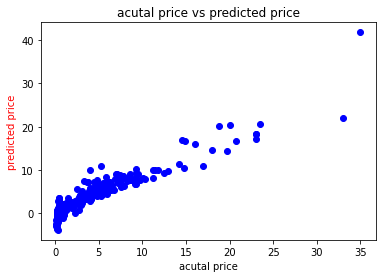

In [132]:
plt.scatter(y_train, training_data_prediction,color = ['b'])
plt.xlabel("acutal price")
plt.ylabel("predicted price", color = 'r')
plt.title("acutal price vs predicted price")
plt.show

In [133]:
test_data_prediction = lin_reg_model.predict(x_test)

# r squared error
error_score = metrics.r2_score(y_test, test_data_prediction )

print("R squared error : ", error_score)

R squared error :  0.8365766715027051


<function matplotlib.pyplot.show(*args, **kw)>

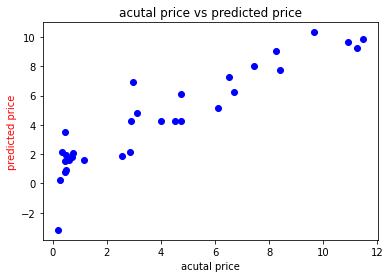

In [134]:
plt.scatter(y_test, test_data_prediction,color = ['b'])
plt.xlabel("acutal price")
plt.ylabel("predicted price", color = 'r')
plt.title("acutal price vs predicted price")
plt.show

Lesso regression

In [136]:
lass_reg_model = Lasso()

In [137]:
lass_reg_model.fit(x_train, y_train)

Lasso()

In [138]:
training_data_prediction = lass_reg_model.predict(x_train)

In [139]:
# r squared error
error_score = metrics.r2_score(y_train, training_data_prediction )

In [140]:
print("R squared error : ", error_score)

R squared error :  0.8427856123435794


<function matplotlib.pyplot.show(*args, **kw)>

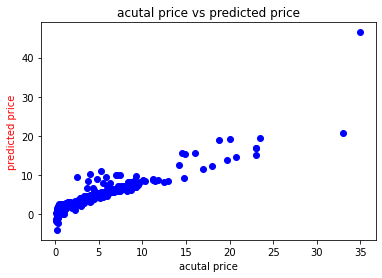

In [141]:
plt.scatter(y_train, training_data_prediction,color = ['b'])
plt.xlabel("acutal price")
plt.ylabel("predicted price", color = 'r')
plt.title("acutal price vs predicted price")
plt.show

In [143]:
train_data_prediction = lass_reg_model.predict(x_train)

# r squared error
error_score = metrics.r2_score(y_train, train_data_prediction )

print("R squared error : ", error_score)

R squared error :  0.8427856123435794


<function matplotlib.pyplot.show(*args, **kw)>

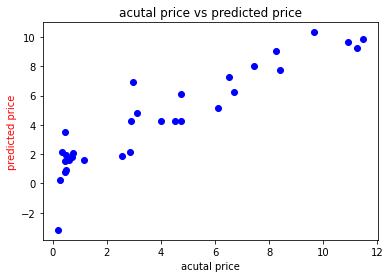

In [144]:
plt.scatter(y_test, test_data_prediction,color = ['b'])
plt.xlabel("acutal price")
plt.ylabel("predicted price", color = 'r')
plt.title("acutal price vs predicted price")
plt.show